
# Social Force Model Simulation with Data Collection

Este notebook ejecuta una simulación del modelo de fuerza social y recolecta datos sobre el número total de cambios de fila de los peatones. Posteriormente, se generan gráficas que muestra la evolución de esta métrica a lo largo del tiempo.


In [5]:

import matplotlib.pyplot as plt
from mesa import Model, Agent
from mesa.time import RandomActivation
from mesa.space import MultiGrid
from mesa.datacollection import DataCollector
import random
import pandas as pd

from agent import Peaton, Obstaculo
from model import SocialForceModel


In [67]:

# Parámetros de la simulación 1
num_peatones = 50
num_obstaculos = 0
width, height = 300, 10

# Crear y ejecutar el modelo
modelo = SocialForceModel(num_peatones, width, height, num_obstaculos)
for i in range(1000):  # Número de pasos de la simulación
    modelo.step()

# Recopilar los datos
datos = modelo.datacollector.get_model_vars_dataframe()

print(datos.head())




   Total Cambios de Fila                                         Densidades
0                      2  {'norte_derecha': 8, 'norte_izquierda': 5, 'ce...
1                      3  {'norte_derecha': 8, 'norte_izquierda': 5, 'ce...
2                      4  {'norte_derecha': 9, 'norte_izquierda': 5, 'ce...
3                      5  {'norte_derecha': 9, 'norte_izquierda': 5, 'ce...
4                      8  {'norte_derecha': 9, 'norte_izquierda': 5, 'ce...


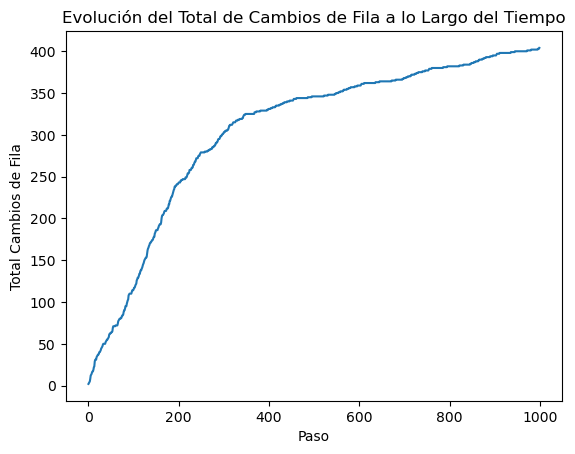

In [68]:
# Graficar la evolución del total de cambios de fila
plt.plot(datos['Total Cambios de Fila'])
plt.xlabel('Paso')
plt.ylabel('Total Cambios de Fila')
plt.title('Evolución del Total de Cambios de Fila a lo Largo del Tiempo')
plt.show()

In [69]:

densidades_df = datos['Densidades'].apply(pd.Series)

datos_combinados = pd.concat([datos, densidades_df], axis=1)

print(datos_combinados.head())

   Total Cambios de Fila                                         Densidades  \
0                      2  {'norte_derecha': 8, 'norte_izquierda': 5, 'ce...   
1                      3  {'norte_derecha': 8, 'norte_izquierda': 5, 'ce...   
2                      4  {'norte_derecha': 9, 'norte_izquierda': 5, 'ce...   
3                      5  {'norte_derecha': 9, 'norte_izquierda': 5, 'ce...   
4                      8  {'norte_derecha': 9, 'norte_izquierda': 5, 'ce...   

   norte_derecha  norte_izquierda  centro_derecha  centro_izquierda  \
0              8                5               6                 7   
1              8                5               6                 7   
2              9                5               5                 7   
3              9                5               5                 7   
4              9                5               5                 7   

   sur_derecha  sur_izquierda  
0           11             13  
1           11             13  
2 

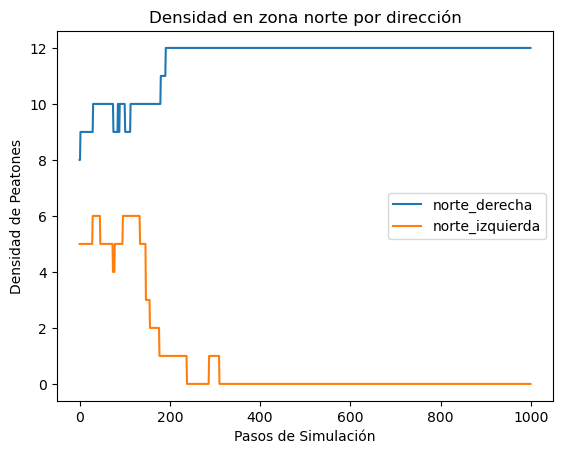

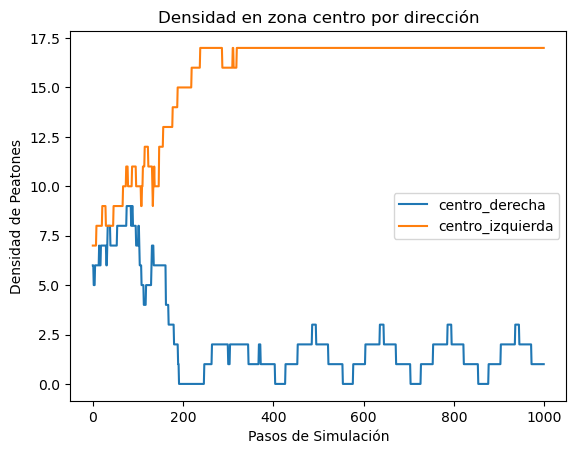

In [70]:
# Graficar la densidad para cada zona y dirección
for zona in ['norte', 'centro', 'sur']:
    datos_combinados[[f'{zona}_derecha', f'{zona}_izquierda']].plot(kind='line')
    plt.title(f"Densidad en zona {zona} por dirección")
    plt.ylabel('Densidad de Peatones')
    plt.xlabel('Pasos de Simulación')
    plt.show()

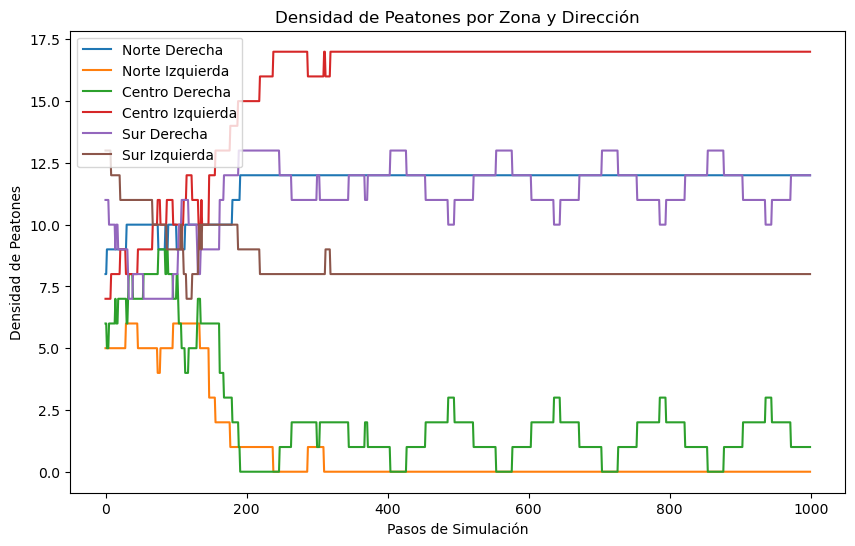

In [71]:
plt.figure(figsize=(10, 6))
plt.title('Densidad de Peatones por Zona y Dirección')

# Graficar cada serie de datos en el mismo gráfico
for zona in ['norte', 'centro', 'sur']:
    for direccion in ['derecha', 'izquierda']:
        plt.plot(datos_combinados[f'{zona}_{direccion}'], label=f'{zona.capitalize()} {direccion.capitalize()}')

plt.ylabel('Densidad de Peatones')
plt.xlabel('Pasos de Simulación')
plt.legend()
plt.show()

In [72]:
# Parámetros de la simulación 2
num_peatones = 150
num_obstaculos = 0
width, height = 100, 10

# Crear y ejecutar el modelo
modelo = SocialForceModel(num_peatones, width, height, num_obstaculos)
for i in range(1000):  # Número de pasos de la simulación
    modelo.step()

# Recopilar los datos
datos = modelo.datacollector.get_model_vars_dataframe()

print(datos.head())

   Total Cambios de Fila                                         Densidades
0                     55  {'norte_derecha': 28, 'norte_izquierda': 24, '...
1                     98  {'norte_derecha': 27, 'norte_izquierda': 21, '...
2                    135  {'norte_derecha': 25, 'norte_izquierda': 23, '...
3                    167  {'norte_derecha': 25, 'norte_izquierda': 22, '...
4                    202  {'norte_derecha': 26, 'norte_izquierda': 22, '...


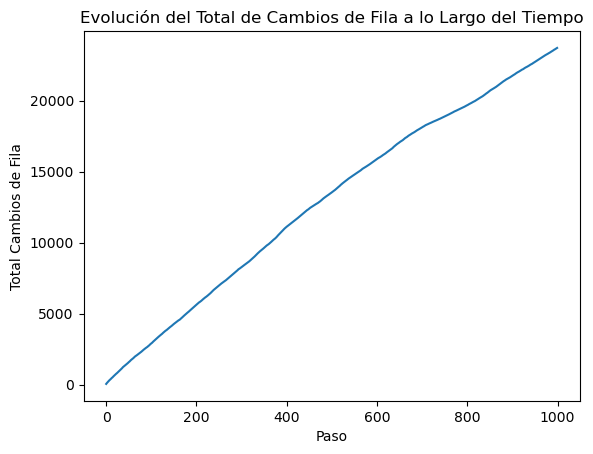

In [73]:
# Graficar la evolución del total de cambios de fila
plt.plot(datos['Total Cambios de Fila'])
plt.xlabel('Paso')
plt.ylabel('Total Cambios de Fila')
plt.title('Evolución del Total de Cambios de Fila a lo Largo del Tiempo')
plt.show()

In [74]:


densidades_df = datos['Densidades'].apply(pd.Series)

datos_combinados = pd.concat([datos, densidades_df], axis=1)

print(datos_combinados.head())



   Total Cambios de Fila                                         Densidades  \
0                     55  {'norte_derecha': 28, 'norte_izquierda': 24, '...   
1                     98  {'norte_derecha': 27, 'norte_izquierda': 21, '...   
2                    135  {'norte_derecha': 25, 'norte_izquierda': 23, '...   
3                    167  {'norte_derecha': 25, 'norte_izquierda': 22, '...   
4                    202  {'norte_derecha': 26, 'norte_izquierda': 22, '...   

   norte_derecha  norte_izquierda  centro_derecha  centro_izquierda  \
0             28               24              24                19   
1             27               21              28                22   
2             25               23              28                20   
3             25               22              24                21   
4             26               22              24                21   

   sur_derecha  sur_izquierda  
0           23             32  
1           20             32  
2 

In [75]:
# Graficar la densidad para cada zona y dirección
for zona in ['norte', 'centro', 'sur']:
    datos_combinados[[f'{zona}_derecha', f'{zona}_izquierda']].plot(kind='line')
    plt.title(f"Densidad en zona {zona} por dirección")
    plt.ylabel('Densidad de Peatones')
    plt.xlabel('Pasos de Simulación')
    plt.show()

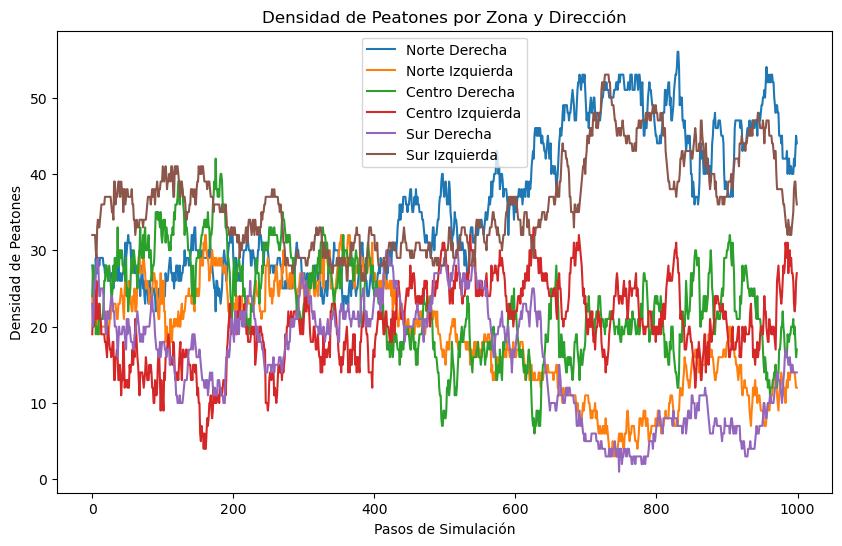

In [76]:
plt.figure(figsize=(10, 6))
plt.title('Densidad de Peatones por Zona y Dirección')

# Graficar cada serie de datos en el mismo gráfico
for zona in ['norte', 'centro', 'sur']:
    for direccion in ['derecha', 'izquierda']:
        plt.plot(datos_combinados[f'{zona}_{direccion}'], label=f'{zona.capitalize()} {direccion.capitalize()}')

plt.ylabel('Densidad de Peatones')
plt.xlabel('Pasos de Simulación')
plt.legend()
plt.show()